In [1]:
import pandas as pd 
import numpy as np
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
df_dataset =pd.read_csv('../data_cleaned/Amazon_Mobile_Data_cleaned.csv')

In [3]:
df_dataset.head(1)

,title,price,rating,total_reviews,availability_status,manufacturer,country_of_origin,os,ram,product_dimensions,weight,batteries,special_features,form_factor,colour,battery_power_rating,product_description
0,OnePlus Nord CE 5G (Blue Void 8GB RAM 128GB St...,45900.00,4.20,4,Only 1 left in stock.,samsung,India,Android,6.00,16.5 x 7.6 x 0.7 cm,167.00,1 Lithium Polymer,"Dual Bluetooth Audio, IR Blaster, X-Axis Hapti...",Touchscreen Phone,Midnight Black,6000.00,Redmi 9A comes with Octa-core Helio G25 proces...


In [4]:
df_dataset.columns

Index(['title', 'price', 'rating', 'total_reviews', 'availability_status',
       'manufacturer', 'country_of_origin', 'os', 'ram', 'product_dimensions',
       'weight', 'batteries', 'special_features', 'form_factor', 'colour',
       'battery_power_rating', 'product_description'],
      dtype='object')

In [5]:
df_dataset.drop(columns=["title","product_description","product_dimensions","availability_status","special_features","total_reviews"],inplace=True)

In [6]:
df_dataset.columns

Index(['price', 'rating', 'manufacturer', 'country_of_origin', 'os', 'ram',
       'weight', 'batteries', 'form_factor', 'colour', 'battery_power_rating'],
      dtype='object')

In [7]:
df_dataset.head()

,price,rating,manufacturer,country_of_origin,os,ram,weight,batteries,form_factor,colour,battery_power_rating
0,45900.00,4.20,samsung,India,Android,6.00,167.00,1 Lithium Polymer,Touchscreen Phone,Midnight Black,6000.00
1,9490.00,4.30,oneplus,India,Android,8.00,161.00,1 Lithium Polymer,Smartphone,Prism Black,4400.00
2,44000.00,4.20,oppo,India,Android 10,8.00,196.00,1 Lithium Polymer,Bar,Galactic Blue,4500.00
3,21490.00,4.30,oppo,India,Android,0.03,175.00,1 Lithium ion,Bar,Aqua Green,4000.00
4,39999.00,4.40,bhagwati products ltd. sp1-1 industrial area k...,India,Android,4.00,199.00,1 A,Touchscreen Phone,Champagne,6000.00


In [8]:
df_dataset.describe()

,price,rating,ram,weight,battery_power_rating
count,264.00,264.00,264.00,264.00,264.00
mean,23603.84,4.02,7.53,211.97,4588.38
std,13055.95,0.48,8.14,100.74,1062.19
min,775.00,1.00,0.03,0.37,9.00
25%,11490.00,3.90,4.00,180.00,4250.00
50%,21580.00,4.20,6.00,191.50,4510.00
75%,34992.25,4.30,8.00,199.00,5000.00
max,59999.00,5.00,64.00,900.00,7000.00


In [9]:
y = df_dataset['price']
X = df_dataset[['rating',  'manufacturer', 'country_of_origin',
       'os', 'ram', 'weight', 'batteries', 'form_factor',
       'colour', 'battery_power_rating']]


In [10]:
df_dataset.columns

Index(['price', 'rating', 'manufacturer', 'country_of_origin', 'os', 'ram',
       'weight', 'batteries', 'form_factor', 'colour', 'battery_power_rating'],
      dtype='object')

In [11]:
the_number_column_quantity=0
for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object':  
    the_number_column_quantity=the_number_column_quantity+1
print(the_number_column_quantity)
columns= 3
rows=the_number_column_quantity//columns if the_number_column_quantity%columns==0 else the_number_column_quantity//columns+1

5


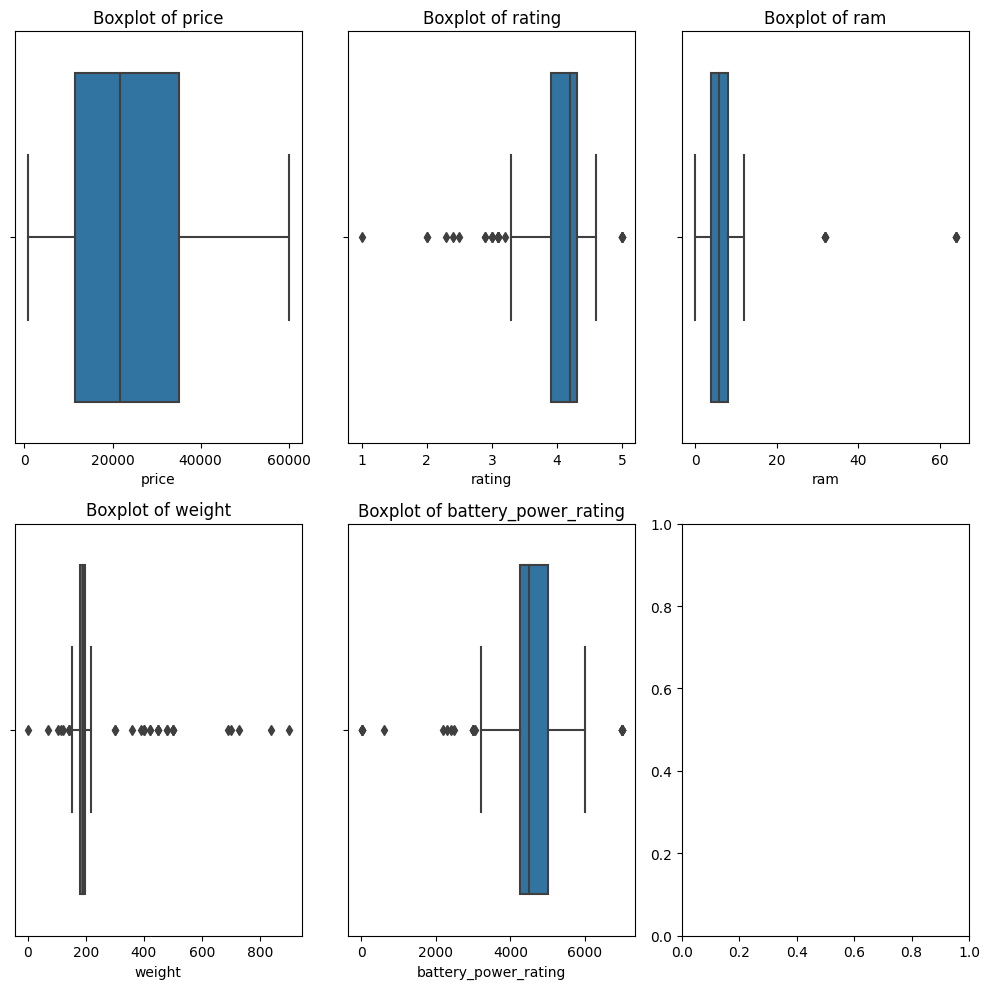

In [12]:

index=0

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object':  
    ax = axes[index//columns, index%columns]
          
    sns.boxplot(x=df_dataset[column],ax=ax)

    ax.set_title(f'Boxplot of {column}')

    index=index+1

plt.tight_layout()

plt.show()
    

In [13]:
df_dataset[df_dataset['battery_power_rating']<2000]

,price,rating,manufacturer,country_of_origin,os,ram,weight,batteries,form_factor,colour,battery_power_rating
53,29990.00,4.30,oneplus,India,Android,6.00,196.00,1 Lithium ion,Bar,Nature Green,600.00
86,49999.00,4.10,oppo,India,Android 10,8.00,172.00,1 Lithium Polymer,Bar,Storm Black,22.00
119,35990.00,3.10,redmi,India,Android,2.00,179.00,1 Lithium ion,Bar,Violet,9.00
169,4699.00,2.00,samsung,India,Funtouch OS 11.1 Global,6.00,173.00,1 Lithium Polymer,Touchscreen-Handy,Fluid black,22.00
215,20499.00,2.90,redmi,India,Android,8.00,175.00,1 A,Bar,Electric Green,22.00
261,13990.00,4.20,iqoo,India,Funtouch OS 11.1,12.00,172.00,1 Lithium Polymer,Bar,Jazz Blue,22.00


In [14]:
df_dataset['battery_power_rating'].unique()

array([6000., 4400., 4500., 4000., 5000., 4780., 4200., 3300., 5020.,
       4030., 3430., 4820., 2300., 4250., 7000., 3700., 4350., 4230.,
       4520.,  600., 3000., 4300., 4310.,   22., 2200., 4085.,    9.,
       2500., 4510., 3600., 4060., 2400., 3200., 3040.])

In [15]:
df_dataset['battery_power_rating'].apply(lambda x: x*1000 if x<10 else (x*100 if x<100 else (x*10 if x<1000 else x))).unique()

array([6000., 4400., 4500., 4000., 5000., 4780., 4200., 3300., 5020.,
       4030., 3430., 4820., 2300., 4250., 7000., 3700., 4350., 4230.,
       4520., 3000., 4300., 4310., 2200., 4085., 9000., 2500., 4510.,
       3600., 4060., 2400., 3200., 3040.])

In [16]:
df_dataset['battery_power_rating']=df_dataset['battery_power_rating'].apply(lambda x: x*1000 if x<10 else (x*100 if x<100 else (x*10 if x<1000 else x)))


In [17]:
df_dataset["battery_power_rating"].unique()

array([6000., 4400., 4500., 4000., 5000., 4780., 4200., 3300., 5020.,
       4030., 3430., 4820., 2300., 4250., 7000., 3700., 4350., 4230.,
       4520., 3000., 4300., 4310., 2200., 4085., 9000., 2500., 4510.,
       3600., 4060., 2400., 3200., 3040.])

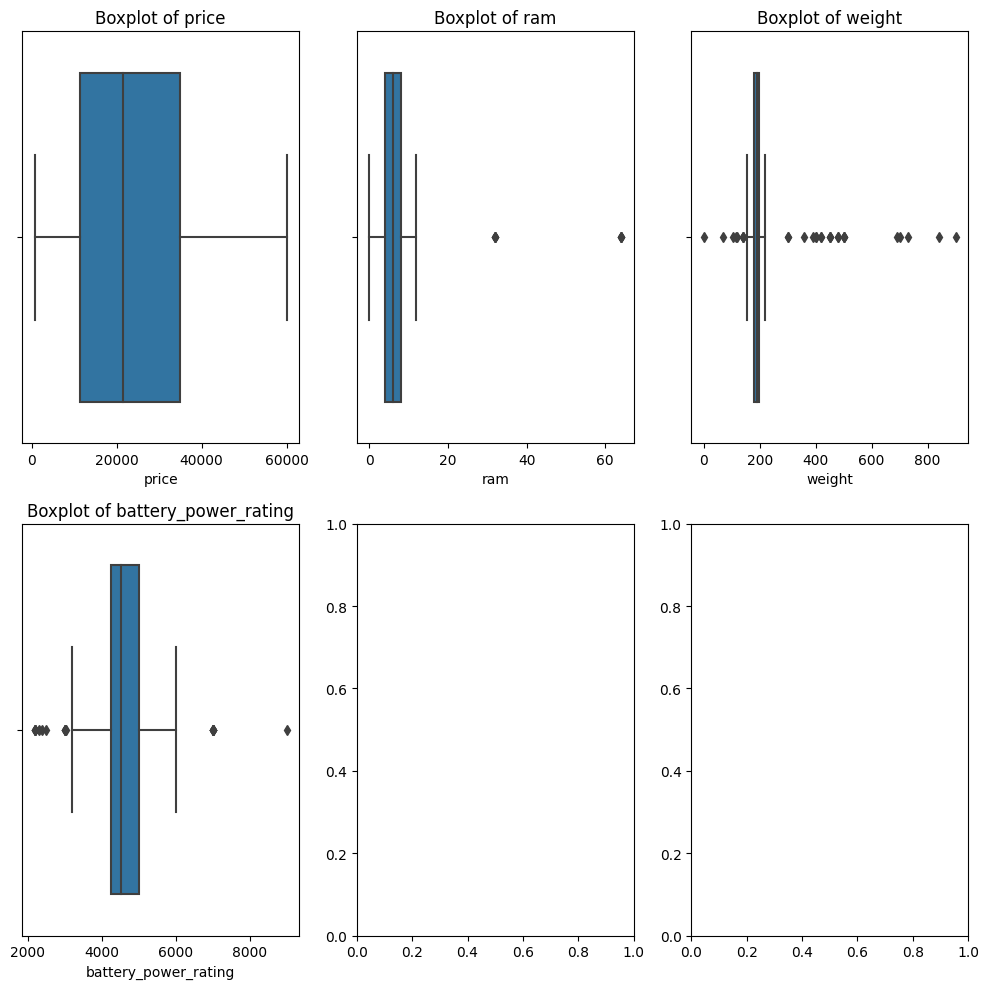

In [18]:

index=0

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object' and column != "rating":  
    ax = axes[index//columns, index%columns]
          
    sns.boxplot(x=df_dataset[column],ax=ax)

    ax.set_title(f'Boxplot of {column}')

    index=index+1

plt.tight_layout()

plt.show()
    

In [19]:
df_dataset['battery_power_rating']=df_dataset['battery_power_rating'].apply(lambda x: x*2 if x<3000 else (x//3 if x>8000 else (x//2 if x>6000 else x)))


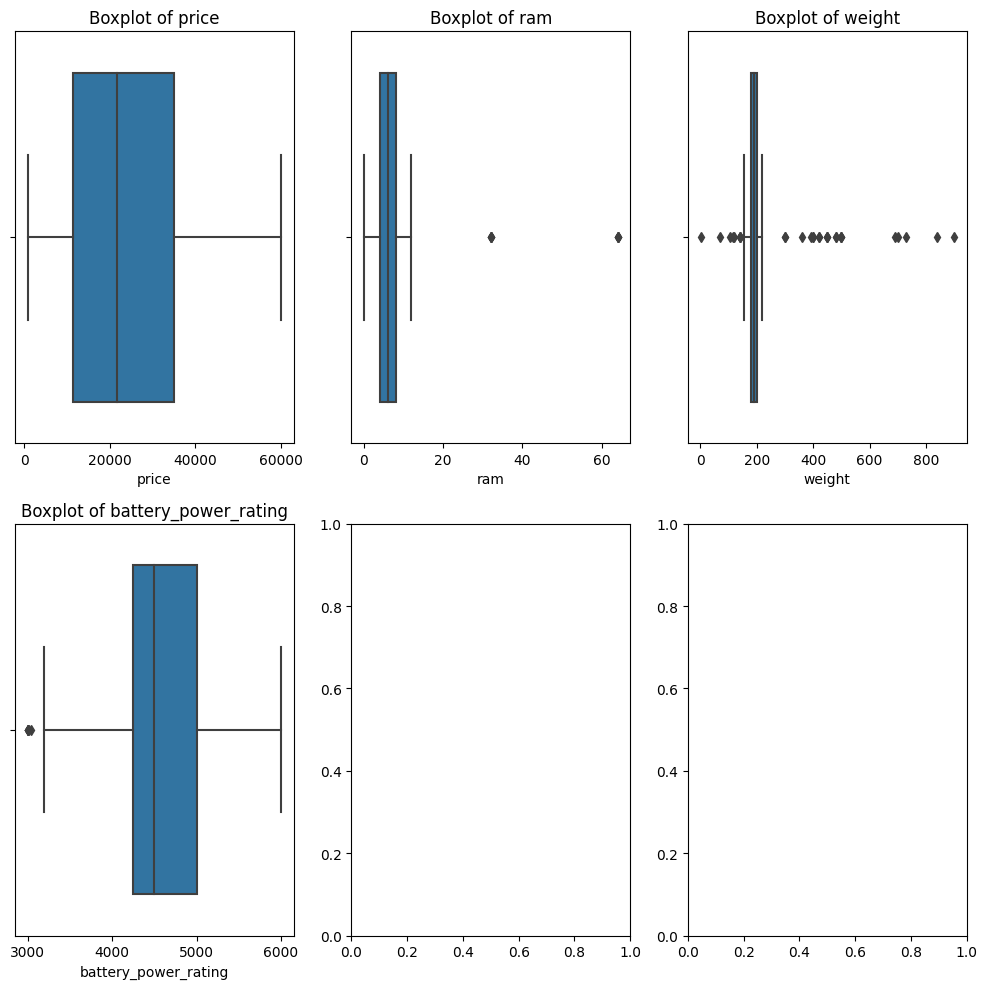

In [20]:
index=0

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object' and column != "rating":  
    ax = axes[index//columns, index%columns]
          
    sns.boxplot(x=df_dataset[column],ax=ax)

    ax.set_title(f'Boxplot of {column}')

    index=index+1

plt.tight_layout()

plt.show()
    

In [21]:
df_dataset[df_dataset["weight"]<100]["weight"].unique()

array([ 0.37, 69.  ])

In [22]:
df_dataset["weight"].apply(lambda x: x*1000 if x<1 else (x*10 if x<100 else x)).unique()

array([167.  , 161.  , 196.  , 175.  , 199.  , 193.  , 141.75, 370.  ,
       840.  , 180.  , 194.  , 690.  , 209.  , 197.  , 141.  , 215.  ,
       450.  , 185.5 , 190.  , 188.  , 420.  , 480.  , 157.  , 218.  ,
       198.  , 184.  , 177.  , 187.  , 213.  , 172.  , 500.  , 173.  ,
       176.  , 179.  , 216.  , 192.  , 202.  , 170.  , 169.  , 214.  ,
       360.  , 186.  , 400.  , 206.  , 205.  , 185.  , 203.  , 210.  ,
       730.  , 300.  , 165.  , 392.  , 160.  , 183.  , 207.  , 208.  ,
       105.  , 191.  , 120.  , 900.  , 700.  , 154.  , 181.  , 114.  ,
       156.  ])

In [23]:
df_dataset["weight"]=df_dataset["weight"].apply(lambda x: x*1000 if x<1 else (x*10 if x<100 else x))


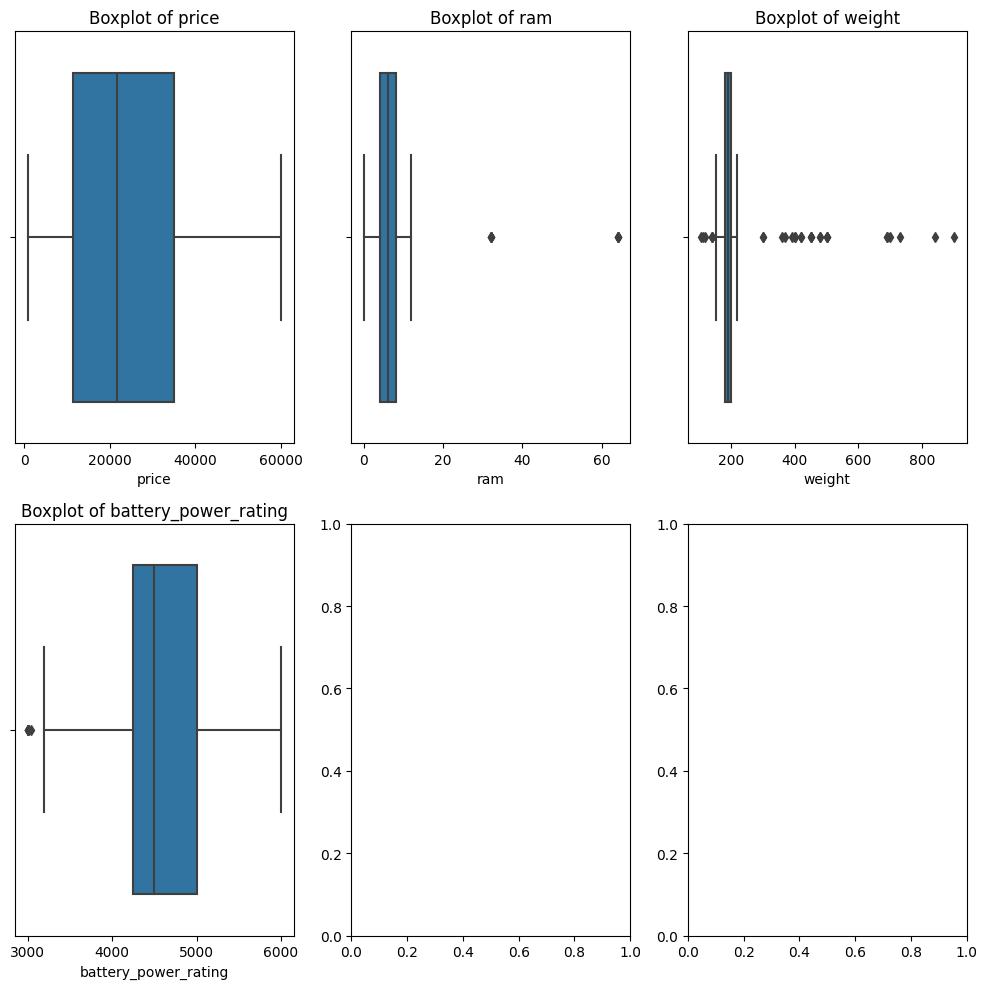

In [24]:

index=0

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object' and column != "rating":  
    ax = axes[index//columns, index%columns]
          
    sns.boxplot(x=df_dataset[column],ax=ax)

    ax.set_title(f'Boxplot of {column}')

    index=index+1

plt.tight_layout()

plt.show()
    

In [25]:
df_dataset[df_dataset["weight"] > 250]["weight"].unique()

array([370., 840., 690., 450., 420., 480., 500., 360., 400., 730., 300.,
       392., 900., 700.])

In [26]:
df_dataset["weight"]=df_dataset["weight"].apply(lambda x: x//4 if x>700 else (x//3 if x>500 else (x//2 if x>250 else x)))

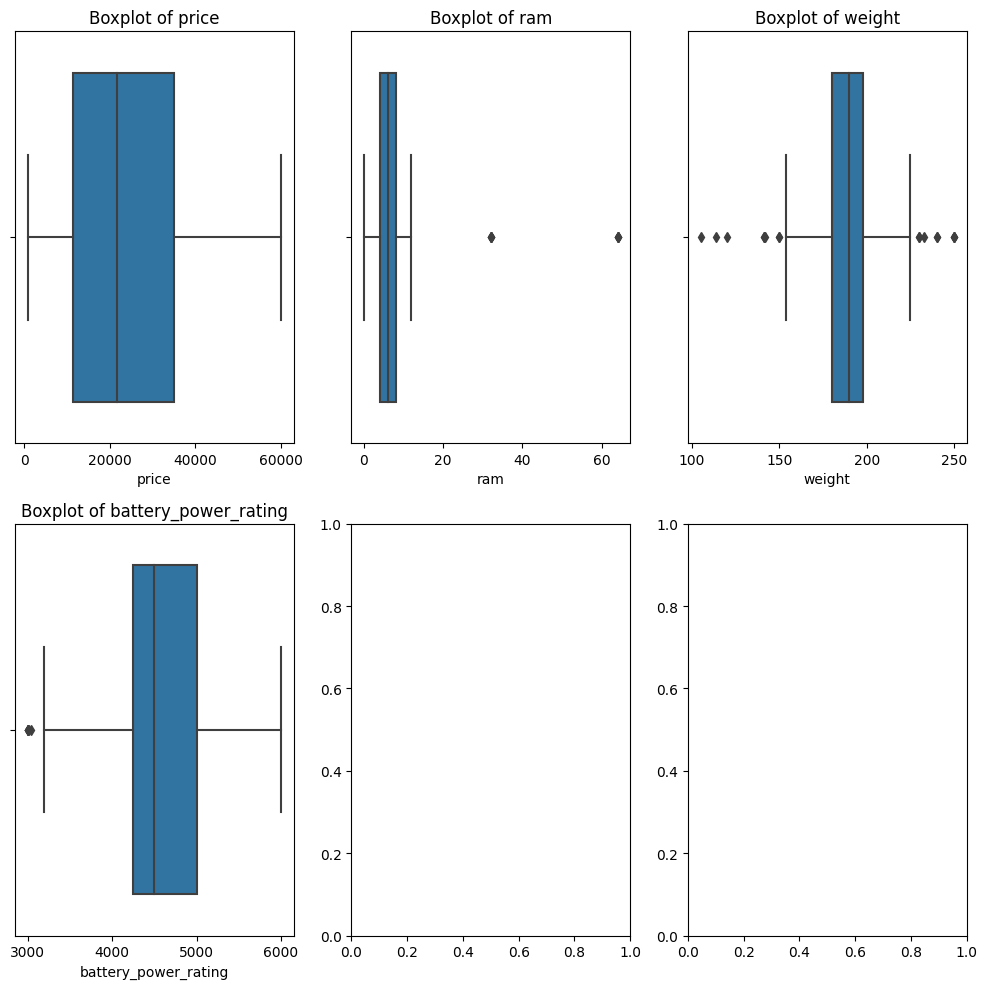

In [27]:

index=0

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object' and column != "rating":  
    ax = axes[index//columns, index%columns]
          
    sns.boxplot(x=df_dataset[column],ax=ax)

    ax.set_title(f'Boxplot of {column}')

    index=index+1

plt.tight_layout()

plt.show()
    

In [28]:
df_dataset[(df_dataset["battery_power_rating"]<3400) & (df_dataset["ram"]<20) &  ((df_dataset["weight"]>225) |(df_dataset["weight"]<150))]

,price,rating,manufacturer,country_of_origin,os,ram,weight,batteries,form_factor,colour,battery_power_rating
17,42299.00,4.00,samsung,India,Android,8.00,141.00,1 Lithium ion,Touchscreen Phone,Dark Pearl,3300.00


In [29]:
print(len(df_dataset))
df_dataset=df_dataset[(df_dataset["battery_power_rating"]>=3400) | (df_dataset["ram"]>20) |  ((df_dataset["weight"]<=225) &(df_dataset["weight"]>=150))]
print(len(df_dataset))


264
263


In [30]:
df_dataset[(df_dataset["battery_power_rating"]<3400) & (df_dataset["ram"]<20) &  ((df_dataset["weight"]>225) |(df_dataset["weight"]<150))]

,price,rating,manufacturer,country_of_origin,os,ram,weight,batteries,form_factor,colour,battery_power_rating


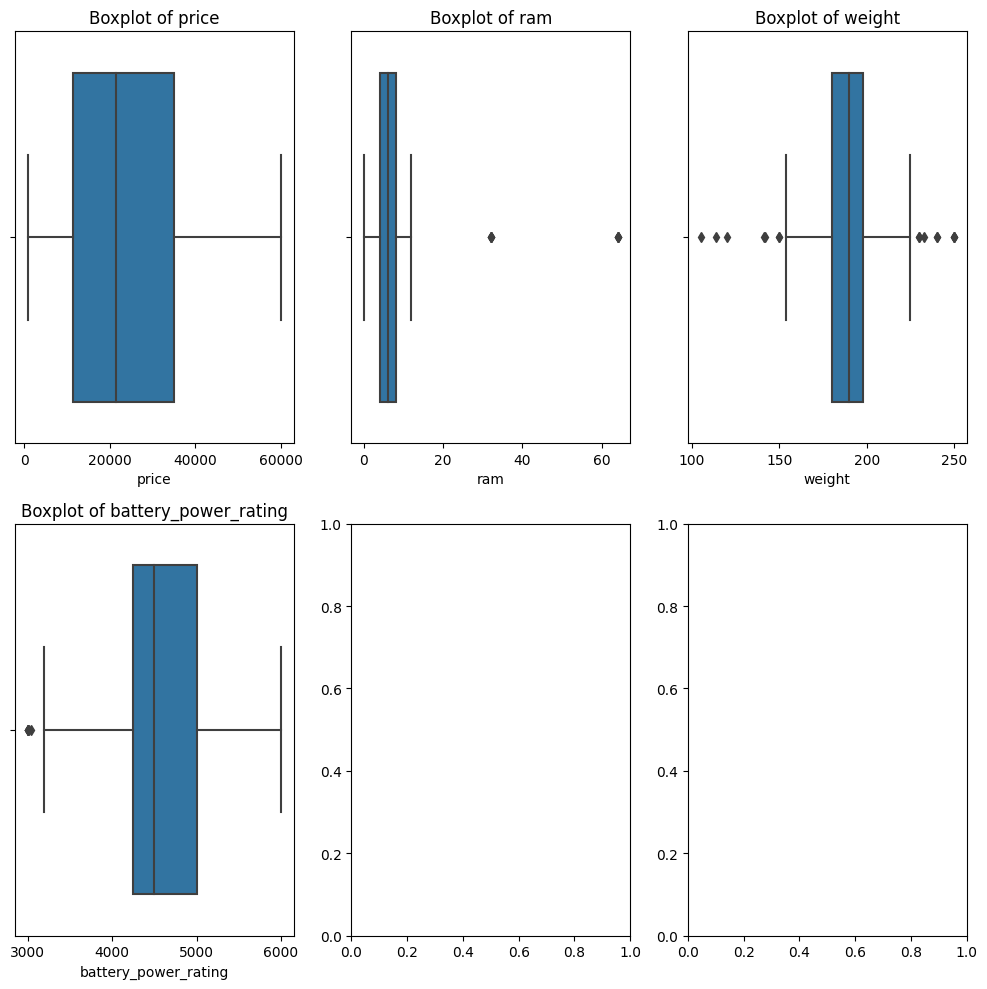

In [31]:

index=0

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

for column in df_dataset.columns:
  if df_dataset[column].dtype != 'object' and column != "rating":  
    ax = axes[index//columns, index%columns]
          
    sns.boxplot(x=df_dataset[column],ax=ax)

    ax.set_title(f'Boxplot of {column}')

    index=index+1

plt.tight_layout()

plt.show()
    

In [32]:
df_dataset.describe()


,price,rating,ram,weight,battery_power_rating
count,263.00,263.00,263.00,263.00,263.00
mean,23532.76,4.02,7.53,190.05,4621.05
std,13029.56,0.48,8.15,19.39,683.14
min,775.00,1.00,0.03,105.00,3000.00
25%,11490.00,3.90,4.00,180.00,4250.00
50%,21490.00,4.20,6.00,190.00,4500.00
75%,34990.00,4.30,8.00,198.00,5000.00
max,59999.00,5.00,64.00,250.00,6000.00


In [33]:
# df_dataset.drop(columns=["country_of_origin"],inplace=True)

In [34]:
df_dataset.describe()


,price,rating,ram,weight,battery_power_rating
count,263.00,263.00,263.00,263.00,263.00
mean,23532.76,4.02,7.53,190.05,4621.05
std,13029.56,0.48,8.15,19.39,683.14
min,775.00,1.00,0.03,105.00,3000.00
25%,11490.00,3.90,4.00,180.00,4250.00
50%,21490.00,4.20,6.00,190.00,4500.00
75%,34990.00,4.30,8.00,198.00,5000.00
max,59999.00,5.00,64.00,250.00,6000.00


In [35]:
df_dataset.to_csv("df_dataset_after_re_processing.csv",index=False)

In [36]:

categorical_cols = [col for col in df_dataset.columns if df_dataset[col].dtype == 'object']
categorical_cols
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
for col in categorical_cols:
  df_dataset[col]= le.fit_transform(df_dataset[col]) 


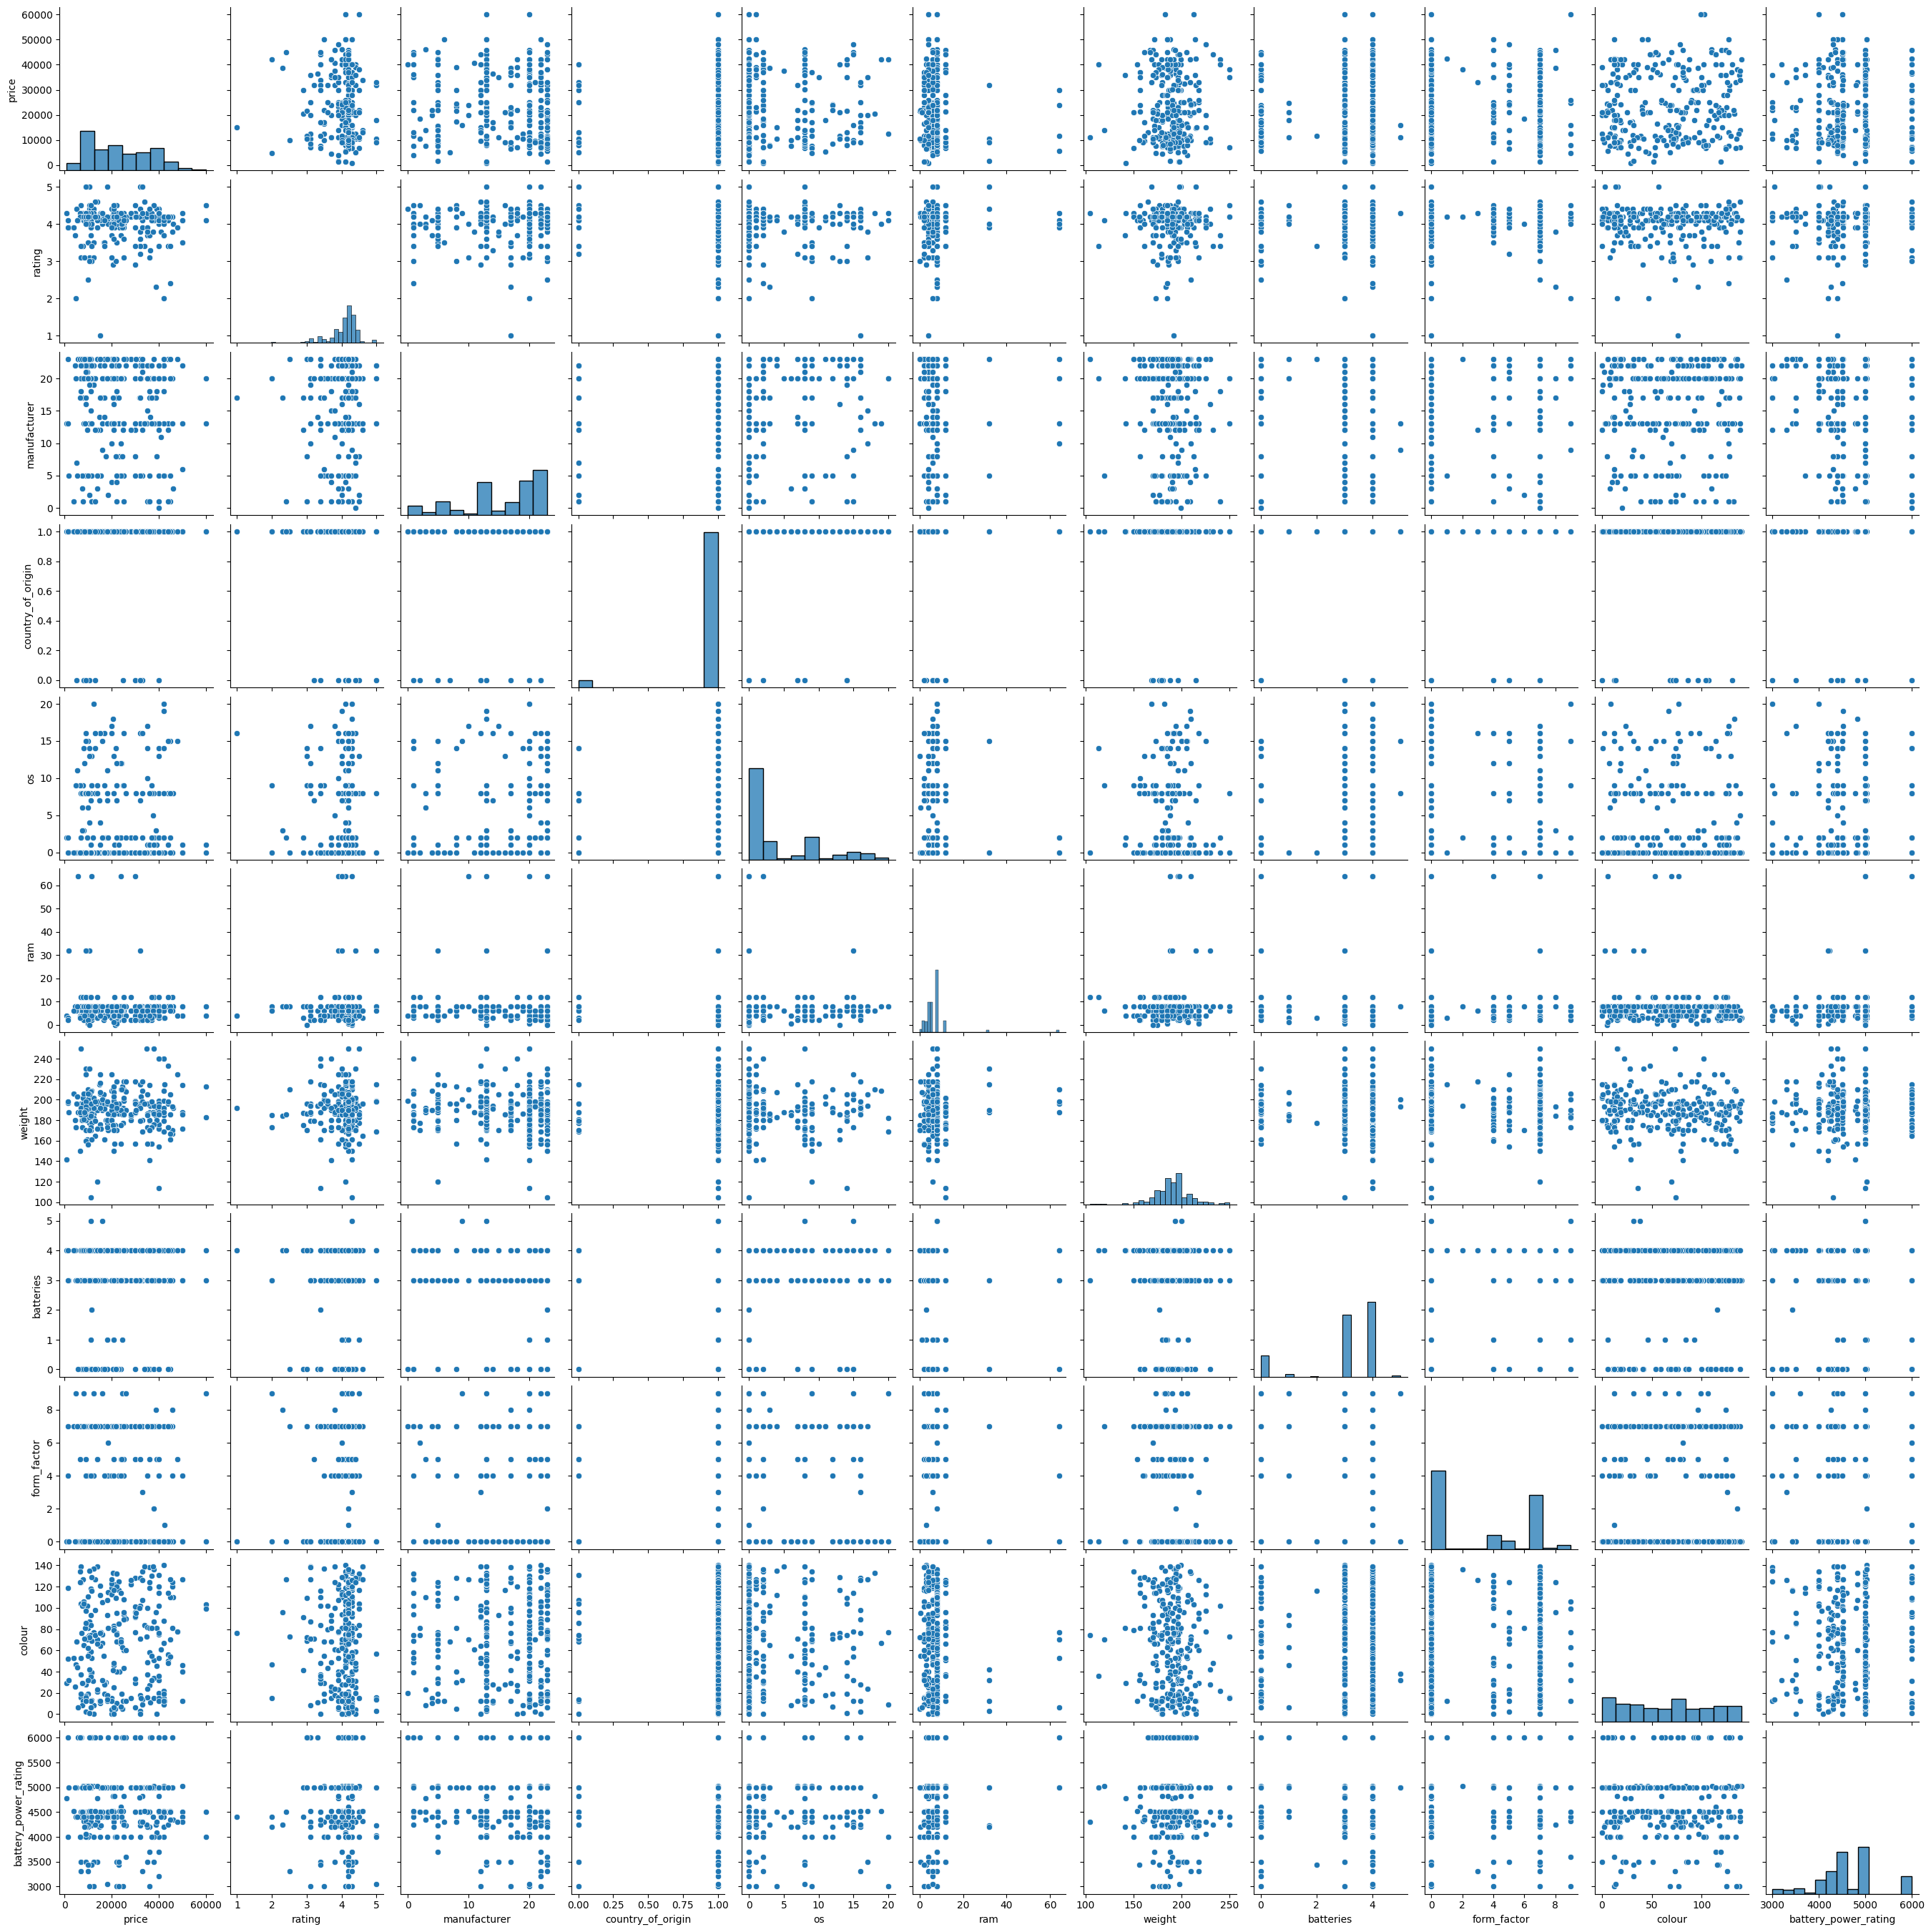

In [37]:
sns.pairplot(df_dataset)

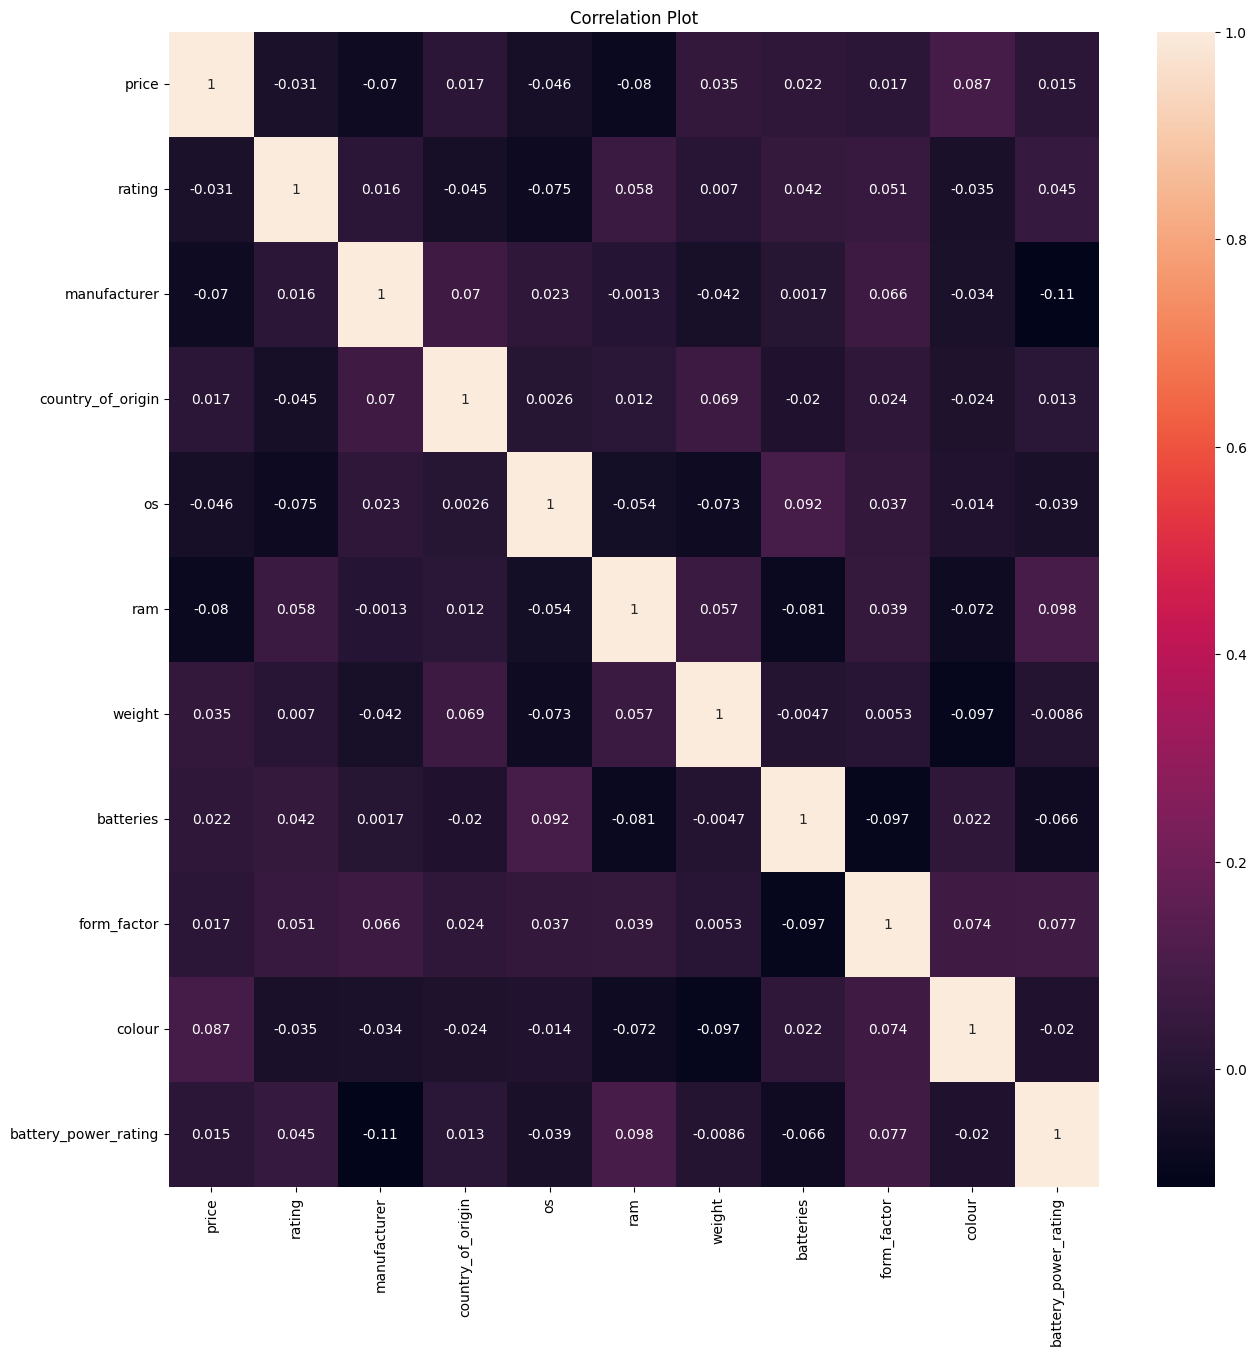

In [38]:
corr_matrix = df_dataset.corr()
corr_matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True )
plt.title('Correlation Plot')
plt.show()

In [39]:

print(len(corr_matrix["price"][(corr_matrix["price"]>0.8)|(corr_matrix["price"]<-0.8)])-1)


0


In [40]:
corr_matrix.columns

Index(['price', 'rating', 'manufacturer', 'country_of_origin', 'os', 'ram',
       'weight', 'batteries', 'form_factor', 'colour', 'battery_power_rating'],
      dtype='object')